In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r"C:/Users/Admin/Desktop/JN/bengaluru_house_prices.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Data Analylis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

REmove unwanted columns

In [8]:
data3 = df.drop(['availability','society'],axis='columns')

In [9]:
data3.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
data3.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

in SIze columns it contains some float type data and some string type data but column type shows object

In [13]:
def fun(text): 
    if type(text) is float : 
        return text 
    else :
        text1 = text.split(' ')
        return float(text1[0])

In [14]:
data3['bedroom']= data3['size'].apply(fun)

In [15]:
data3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [16]:
data3['bedroom'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [17]:
data3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def total_sqft_chk(text):
    if type(text) is int or type(text) is float : 
        return float(text)
    elif type(text) is str :
        text1 = text.split('-')
        if len(text1)==2:
            return float(text1[0]) + float(text1[1])/2
        try : 
            return float(text)
        except :
            return None
    

In [19]:
data3['Total_SQFT'] = data3['total_sqft'].apply(total_sqft_chk)

In [20]:
data3.head(2)

,area_type,location,size,total_sqft,bath,balcony,price,bedroom,Total_SQFT
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0,2600.0


In [21]:
data3['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [23]:
loc_stat = data3.groupby('location')['location'].agg('count')

In [24]:
loc_stat.sort_values(ascending=False)

location
Whitefield              540
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
 Whitefield               1
 Sector 1 HSR Layout      1
 Bhoganhalli              1
 Basavangudi              1
 Banaswadi                1
Name: location, Length: 1305, dtype: int64

In [25]:
len(loc_stat)

1305

In [26]:
len(loc_stat[loc_stat<=10])

1064

In [27]:
loc_stat_less_than_10 = (loc_stat[loc_stat<=10])

In [28]:
loc_stat_less_than_10.sort_values(ascending=False)

location
1st Block Koramangala    10
Sadashiva Nagar          10
Gunjur Palya             10
Nagadevanahalli          10
Basapura                 10
                         ..
 Whitefield               1
 Sector 1 HSR Layout      1
 Bhoganhalli              1
 Basavangudi              1
 Banaswadi                1
Name: location, Length: 1064, dtype: int64

In [29]:
data3 = data3.dropna(subset=['location'])

In [30]:
data3['location'].isna().sum()

np.int64(0)

In [31]:
def location_chk(txt):
    if len(txt)< max(loc_stat_less_than_10):
        return 'other'
    else :
        return txt

In [32]:
data3['location'] = data3['location'].apply(location_chk)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12012\1986468668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['location'] = data3['location'].apply(location_chk)


In [33]:
data3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bedroom,Total_SQFT
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,other,2 BHK,1200,2.0,1.0,51.00,2.0,1200.0


In [34]:
data3['price_per_sqft'] = data3['price']*100000/data3['Total_SQFT']

C:\Users\Admin\AppData\Local\Temp\ipykernel_12012\1402876604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['price_per_sqft'] = data3['price']*100000/data3['Total_SQFT']


In [35]:
data3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bedroom,Total_SQFT,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,other,2 BHK,1200,2.0,1.0,51.00,2.0,1200.0,4250.000000


In [36]:
data3 = data3.drop(['size','total_sqft'],axis='columns')

In [37]:
data3.head()

,area_type,location,bath,balcony,price,bedroom,Total_SQFT,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,other,2.0,1.0,51.00,2.0,1200.0,4250.000000


In [38]:
data3.isna().sum()

area_type           0
location            0
bath               73
balcony           609
price               0
bedroom            16
Total_SQFT         46
price_per_sqft     46
dtype: int64

In [39]:
data3['bath']= data3['bath'].fillna(0)
data3['balcony']= data3['balcony'].fillna(0)
data3['bedroom']= data3['bedroom'].fillna(0)

In [40]:
data3.isna().sum()

area_type          0
location           0
bath               0
balcony            0
price              0
bedroom            0
Total_SQFT        46
price_per_sqft    46
dtype: int64

In [41]:
data4 = data3

In [42]:
data4.head()

,area_type,location,bath,balcony,price,bedroom,Total_SQFT,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,other,2.0,1.0,51.00,2.0,1200.0,4250.000000


In [43]:
data4.isna().sum()

area_type          0
location           0
bath               0
balcony            0
price              0
bedroom            0
Total_SQFT        46
price_per_sqft    46
dtype: int64

In [44]:
data4 = data4.dropna(subset=['Total_SQFT','price_per_sqft'])

In [45]:
data4.isna().sum()

area_type         0
location          0
bath              0
balcony           0
price             0
bedroom           0
Total_SQFT        0
price_per_sqft    0
dtype: int64

In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

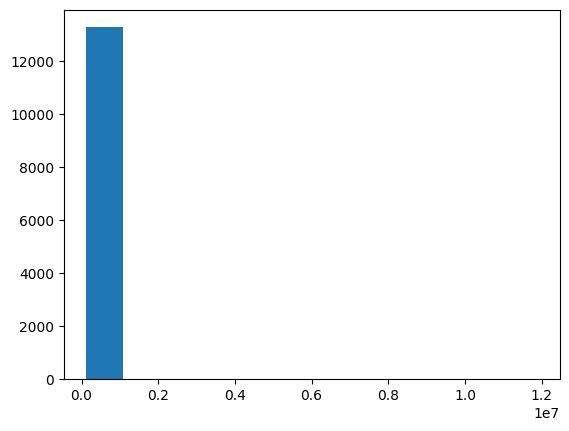

In [49]:
plt.hist(data4['price_per_sqft'],rwidth=0.8)
plt.show()

In [50]:
data4.describe()

,bath,balcony,price,bedroom,Total_SQFT,price_per_sqft
count,13273.000000,13273.000000,13273.000000,13273.000000,13273.000000,1.327300e+04
mean,2.676335,1.513373,112.455647,2.799292,1572.223848,7.883443e+03
std,1.349981,0.863755,149.075807,1.294995,1254.870321,1.064343e+05
min,0.000000,0.000000,8.000000,0.000000,1.000000,2.678298e+02
25%,2.000000,1.000000,50.000000,2.000000,1100.000000,4.227642e+03
50%,2.000000,2.000000,72.000000,3.000000,1280.000000,5.416667e+03
75%,3.000000,2.000000,120.000000,3.000000,1690.000000,7.294118e+03
max,40.000000,3.000000,3600.000000,43.000000,52272.000000,1.200000e+07


In [51]:
Q1 = data4['price_per_sqft'].quantile(0.1)
Q2 = data4['price_per_sqft'].quantile(0.9)

In [52]:
Q1

np.float64(3499.260348583878)

In [53]:
Q2

np.float64(11593.22033898305)

In [54]:
data5 = data4[(data4['price_per_sqft']<=Q2) & (data4['price_per_sqft']>=Q1)]

In [55]:
data5.head()

,area_type,location,bath,balcony,price,bedroom,Total_SQFT,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0,6245.890861
4,Super built-up Area,other,2.0,1.0,51.00,2.0,1200.0,4250.000000


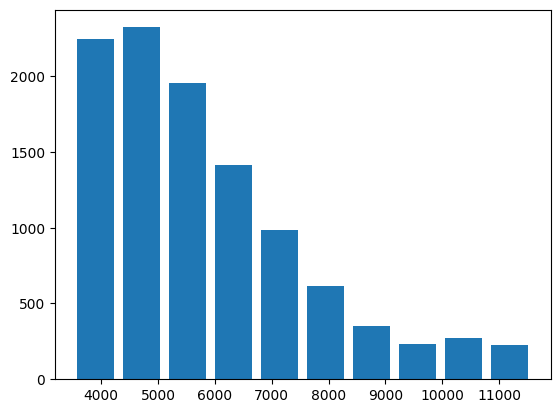

In [56]:
plt.hist(data5['price_per_sqft'],rwidth=0.8)
plt.show()

In [57]:
data5.describe()

,bath,balcony,price,bedroom,Total_SQFT,price_per_sqft
count,10618.000000,10618.000000,10618.000000,10618.000000,10618.000000,10618.000000
mean,2.558486,1.545771,93.171285,2.669994,1532.301242,5834.370937
std,1.084982,0.840499,74.269271,1.011829,907.974549,1799.509610
min,0.000000,0.000000,13.500000,0.000000,276.000000,3499.264706
25%,2.000000,1.000000,52.802500,2.000000,1116.000000,4462.987266
50%,2.000000,2.000000,70.090000,3.000000,1300.000000,5416.666667
75%,3.000000,2.000000,107.000000,3.000000,1673.750000,6761.776440
max,16.000000,3.000000,2100.000000,16.000000,30400.000000,11593.220339


In [58]:
Q1 = data5['bath'].quantile(0.1)
Q2 = data5['bath'].quantile(0.9)

In [59]:
Q1,Q2

(np.float64(2.0), np.float64(4.0))

In [60]:
data6 = data5[(data5['bath']<=Q2) & (data5['bath'])]

In [61]:
data6.describe()

,bath,balcony,price,bedroom,Total_SQFT,price_per_sqft
count,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000
mean,2.389964,1.556464,86.107502,2.530028,1443.209642,5747.833912
std,0.713087,0.816988,64.040234,0.743790,765.316211,1728.939573
min,1.000000,0.000000,13.500000,1.000000,276.000000,3499.264706
25%,2.000000,1.000000,52.000000,2.000000,1105.000000,4444.033708
50%,2.000000,2.000000,69.000000,2.000000,1277.500000,5341.563316
75%,3.000000,2.000000,99.132500,3.000000,1609.250000,6641.983572
max,4.000000,3.000000,2100.000000,8.000000,30400.000000,11593.220339


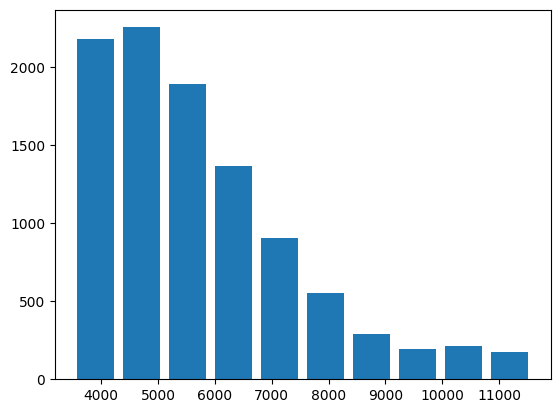

In [62]:
plt.hist(data6['price_per_sqft'],rwidth=0.8)
plt.show()

In [63]:
dummies_loc = pd.get_dummies(data6['location'],dtype=int,drop_first=True)

In [64]:
dummies_loc

,Basavangudi,Bhoganhalli,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Sector 1 HSR Layout,Thanisandra,Whitefield,...,manyata tech park,mvj engineering college,near Ramanashree California resort,other,pavitra paradise,"ravindra nagar, T.dasarahalli peenya",sankeswari,sapthagiri Layout,sarjapura main road,whitefiled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
Final_data = pd.concat([data6,dummies_loc.drop('other',axis='columns')],axis='columns')

In [66]:
Final_data.head()

,area_type,location,bath,balcony,price,bedroom,Total_SQFT,price_per_sqft,Basavangudi,Bhoganhalli,...,manyata park,manyata tech park,mvj engineering college,near Ramanashree California resort,pavitra paradise,"ravindra nagar, T.dasarahalli peenya",sankeswari,sapthagiri Layout,sarjapura main road,whitefiled
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0,3699.810606,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,1440.0,4305.555556,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0,6245.890861,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,other,2.0,1.0,51.00,2.0,1200.0,4250.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Super built-up Area,Old Airport Road,4.0,0.0,204.00,4.0,2732.0,7467.057101,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
dummy_area_type = pd.get_dummies(Final_data['area_type'],drop_first=True, dtype=int)

In [68]:
dummy_area_type.head()

,Carpet Area,Plot Area,Super built-up Area
0,0,0,1
2,0,0,0
3,0,0,1
4,0,0,1
6,0,0,1


In [69]:
final = pd.concat([Final_data,dummy_area_type],axis='columns')

In [70]:
data10 = final.drop(['area_type','location'],axis='columns')

In [71]:
data10.head()

,bath,balcony,price,bedroom,Total_SQFT,price_per_sqft,Basavangudi,Bhoganhalli,Devarabeesana Halli,Devarachikkanahalli,...,near Ramanashree California resort,pavitra paradise,"ravindra nagar, T.dasarahalli peenya",sankeswari,sapthagiri Layout,sarjapura main road,whitefiled,Carpet Area,Plot Area,Super built-up Area
0,2.0,1.0,39.07,2.0,1056.0,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,3.0,62.00,3.0,1440.0,4305.555556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,3.0,1521.0,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,1.0,51.00,2.0,1200.0,4250.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,4.0,0.0,204.00,4.0,2732.0,7467.057101,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
X = data10.drop('price',axis='columns')
y = data10.price

In [73]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20)

In [74]:
len(X_train)

8019

In [75]:
len(X_test)

2005

In [76]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [77]:
model.fit(X_train,y_train)

LinearRegression()

In [79]:
model.score(X_test,y_test)

0.9607426914778816